# Universidad del Valle de Guatemala
## Security Data Science - 10
* Juan Manuel Marroquin Alfaro - 19845
* Carlos Alberto Raxtum Ramos - 19721
* Jose Abraham Gutierrez Corado - 19111
* Walter Danilo Saldaña Salguero - 19897
* Javier Alejandro Cotto Argueta - 19324

## Proyecto Fase 2: Selección de caracteristicas y limpieza de datos

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
import itertools
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

from yellowbrick.cluster import SilhouetteVisualizer
from os import listdir
from os.path import isfile, join
import pandas_profiling
import os
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

## Normal Images

In [2]:
df1 = pd.read_csv('normal_images_info.csv', header = None)
df1.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,65536
193,192.0,121,120,121,121,121,122,122,121,122,...,173,174,174,175,176,175,175,175,176,175
44,43.0,153,153,153,152,152,153,152,153,152,...,119,92,70,101,127,132,86,71,106,72
16,15.0,239,245,255,247,189,208,195,197,218,...,19,17,21,18,17,18,22,20,22,20
459,458.0,12,12,14,15,15,14,14,14,15,...,3,2,3,5,5,5,4,5,5,5
334,333.0,2,2,1,1,2,2,3,2,2,...,0,0,1,0,1,0,0,1,0,1


### Observaciones del Dataframe de Imagenes Normales

In [3]:
df1.shape

(1001, 65537)

## Stego Images

In [4]:
df2 = pd.read_csv('infected_images_info.csv', header = None)
df2.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,65536
394,393.0,76,55,56,53,61,66,60,59,63,...,26,30,40,41,39,45,37,37,37,37
123,122.0,72,41,21,53,53,56,39,27,9,...,117,109,116,114,116,108,112,111,114,106
975,974.0,206,207,207,205,204,201,195,193,189,...,105,96,83,63,42,41,35,47,26,6
810,809.0,189,188,186,184,183,183,183,184,185,...,15,12,13,16,12,12,14,14,13,12
173,172.0,12,12,12,12,12,12,11,12,14,...,90,81,91,64,68,74,49,44,53,58


### Observaciones del Dataframe de Imagenes Alteradas

In [5]:
df2.shape

(1001, 65537)

## Dataframe Completo

Concatenación de los dataframes

In [6]:
#1 Si tiene 0 No tiene
df1['isInfected'] = 0
df2['isInfected'] = 1

df  = pd.concat([df1, df2])
df

,0,1,2,3,4,5,6,7,8,9,...,65528,65529,65530,65531,65532,65533,65534,65535,65536,isInfected
0,NaN,0,1,2,3,4,5,6,7,8,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,0
1,0.0,81,77,81,82,79,82,81,79,81,...,19,20,22,22,17,17,17,22,24,0
2,1.0,6,5,5,6,5,5,5,5,5,...,5,6,5,5,5,5,5,5,5,0
3,2.0,15,16,16,17,16,15,16,16,16,...,18,22,23,15,12,11,12,12,12,0
4,3.0,97,99,96,93,92,93,92,91,91,...,48,60,69,65,61,58,50,49,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,995.0,11,13,15,22,26,24,24,23,24,...,88,88,87,86,87,87,88,87,86,1
997,996.0,66,63,63,62,60,59,49,65,76,...,180,178,187,169,150,137,165,148,85,1
998,997.0,86,87,89,91,84,91,91,88,91,...,58,49,51,58,44,44,45,39,44,1
999,998.0,129,128,150,174,159,162,157,144,130,...,103,102,103,100,88,84,84,76,27,1


### Observaciones del Dataframe completo

In [7]:
df.shape

(2002, 65538)

Eliminamos la columna que guarda el indice dos veces por el método concat

In [8]:
del df[0]

Analisis Exploratorio

In [9]:
#profile = df.profile_report(title="EDM")
#profile.to_file(output_file="proyect_pandas_report.html")

Dado que el dataframe era muy grande, se tomo una pequeña muestra de los datos correspondientes entre los dos dataframe para realizar el modelo.

# Módelos DP/ML/RL

## Naive Bayes

Partimos el SET (entrenamiento 55%, validación 15%, prueba 30%)

In [10]:
X = df.drop(columns = ['isInfected']).copy()
y = df['isInfected']

#Dividiremos nuestros datos en dos gran conjuntos(entrenamiento y data restante)
x_train, x_rem, y_train, y_rem = train_test_split(X, y, train_size = 0.55, random_state = 0)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 654 to 684
Columns: 65536 entries, 1 to 65536
dtypes: int64(65536)
memory usage: 550.5 MB


In [11]:
#Dividiremos nuestros datos en dos gran conjuntos(validación y prueba)
#45% -> 100
#30% -> x
#x = 66.67
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size = 0.66, random_state = 0)
x_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 452 to 473
Columns: 65536 entries, 1 to 65536
dtypes: int64(65536)
memory usage: 153.0 MB


### Observaciones de los conjuntos de Entrenamiento, Validación y Prueba

In [12]:
print("X train shape: ", x_train.shape)
print("Y train shape: ", y_train.shape)
print("X valid shape: ", x_valid.shape)
print("Y valid shape: ", y_valid.shape)
print("X test shape: ", x_test.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (1101, 65536)
Y train shape:  (1101,)
X valid shape:  (306, 65536)
Y valid shape:  (306,)
X test shape:  (595, 65536)
Y test shape:  (595,)


Declaramos el Modelo

In [13]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

Metricas

In [14]:
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

print("Accuracy:", accuray)
print("F1 Score:", f1)
print("Precision", precision)
print("Recall", recall)

Accuracy: 0.4907563025210084
F1 Score: 0.6561859918713822
Precision 0.9931972789115646
Recall 0.4924114671163575


Matriz de Confusión

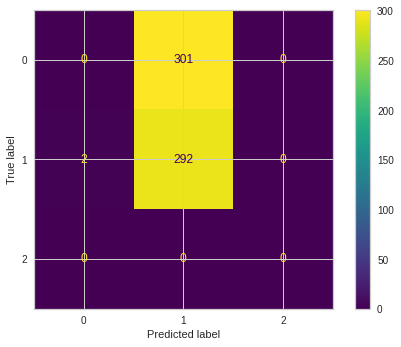

In [15]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

## Gradient Boost Classifier

In [19]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(x_train, y_train)
y_pred = gbm.predict(x_test)

In [20]:
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

print("Accuracy:", accuray)
print("F1 Score:", f1)
print("Precision", precision)
print("Recall", recall)

Accuracy: 0.23697478991596638
F1 Score: 0.23824367884626138
Precision 0.2755102040816326
Recall 0.2515527950310559


###  SVM model


In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

print("Accuracy:", accuray)
print("F1 Score:", f1)
print("Precision", precision)
print("Recall", recall)

In [ ]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();